In [5]:
import pandas as pd
import quandl
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm

c:\users\mojiway\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
df = quandl.get("WIKI/GOOGL")


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0


In [8]:
df= df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [9]:
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100

In [10]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [11]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [60]:
forecast_out = int(math.ceil(0.01*len(df)))

In [65]:
forecast_out

34

In [66]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [67]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,0.896914,-0.029718,1792602.0,NaN
2018-01-31,1182.22,0.346805,-0.134312,1643877.0,NaN
2018-02-01,1181.59,0.495942,0.476195,2774967.0,NaN
2018-02-02,1119.20,1.081129,-0.729098,5798880.0,NaN
2018-02-05,1068.76,4.325574,-2.893850,3742469.0,NaN


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
X = df.loc[:, df.columns != 'label']

In [70]:
 X = X[:-forecast_out]

In [71]:
X_lately = X[-forecast_out:]

In [72]:
df.dropna(inplace=True)
y = np.array(df['label'])

In [73]:
len(X),len(y)

(3355, 3355)

In [74]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.5)

In [75]:
clf = LinearRegression()

In [76]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
accuracy = clf.score(X_test,y_test)

In [78]:
accuracy

0.9786821513194786

In [79]:
forecast_set = clf.predict(X_lately)

In [80]:
forecast_set, accuracy, forecast_out

(array([1011.87486849, 1050.61638965, 1054.91349244, 1055.08074654,
        1064.67325545, 1065.99366047, 1073.12549606, 1065.12806911,
        1075.83082186, 1070.76615077, 1067.46214543, 1063.58751573,
        1064.98396256, 1059.41697828, 1071.03407023, 1057.69043582,
        1057.69287318, 1073.42593459, 1075.2072748 , 1079.75114765,
        1094.91601576, 1084.94126743, 1057.99538325, 1058.30706172,
        1046.48974183, 1032.4500913 , 1039.09097285, 1053.89513077,
        1066.87910879, 1072.004704  , 1075.05267338, 1070.08691999,
        1074.47540404, 1079.47800399]), 0.9786821513194786, 34)

In [96]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [82]:
import datetime

In [126]:
style.use('ggplot')

In [127]:
df['Forecast'] = np.nan

In [128]:
last_date = df.iloc[-1].name

In [129]:
last_unix = last_date.timestamp()

In [130]:
one_day = 86400

In [131]:
next_unix = last_unix + one_day

In [132]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

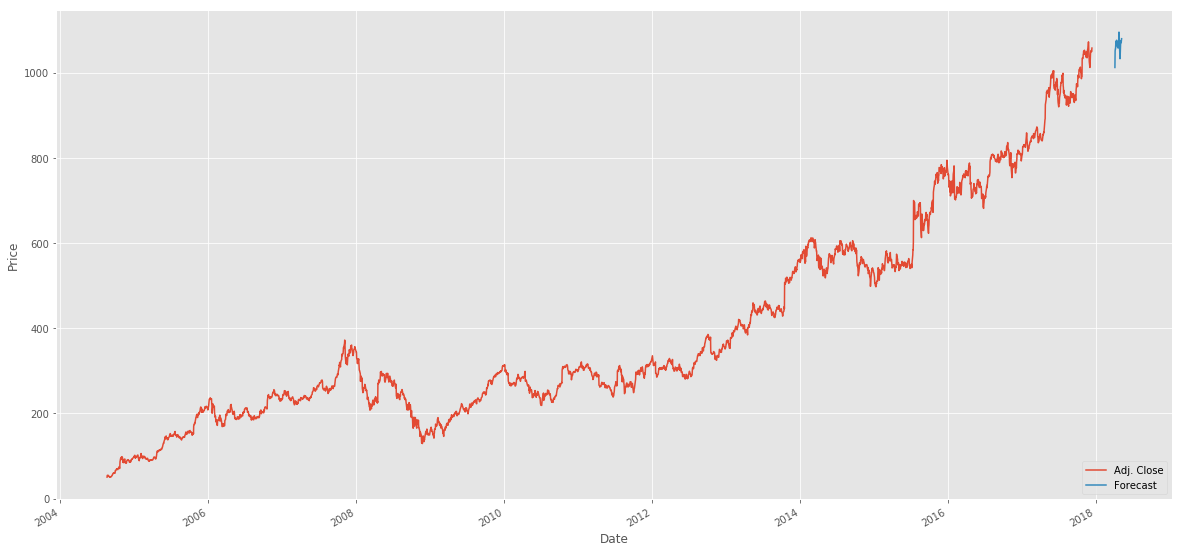

In [134]:
plt.figure(figsize=(20,10))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
